In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [3]:
start = datetime(2003,1,1)
end = datetime(2020,1,1)
TLT = data.DataReader("TLT", 'yahoo', start, end)
IVV= data.DataReader("IVV", 'yahoo', start, end)

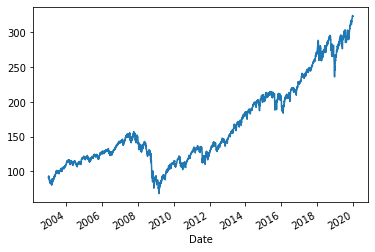

In [4]:
IVV["Close"].T.plot()

In [5]:
returns=pd.DataFrame()
tickers = ['TLT','IVV']
stocks=pd.concat([TLT,IVV], axis=1, keys=["TLT","IVV"])
stocks.columns.names = ['Ticker','Stock Info']

In [6]:
stocks

Ticker             TLT                                                  \
Stock Info        High         Low        Open       Close      Volume   
Date                                                                     
2003-01-02   87.900002   86.209999   87.699997   86.279999    192100.0   
2003-01-03   86.540001   85.830002   86.150002   86.480003    311200.0   
2003-01-06   86.290001   85.809998   86.169998   86.250000     35600.0   
2003-01-07   86.750000   86.169998   86.190002   86.559998     69800.0   
2003-01-08   87.139999   86.779999   86.879997   86.989998    160100.0   
...                ...         ...         ...         ...         ...   
2019-12-24  137.059998  135.889999  135.919998  136.839996   4667400.0   
2019-12-26  137.220001  136.509995  136.910004  137.169998   5290200.0   
2019-12-27  137.630005  137.289993  137.440002  137.320007   7300500.0   
2019-12-30  136.899994  135.660004  135.889999  136.820007   7979700.0   
2019-12-31  136.460007  135.380005  136.210007  135.479996  10707400.0   

Ticker                         IVV                                      \
Stock Info   Adj Close        High         Low        Open       Close   
Date                                                                     
2003-01-02   46.570705   91.180000   88.629997   89.190002   91.160004   
2003-01-03   46.678638   91.370003   90.510002   91.040001   91.370003   
2003-01-06   46.554504   93.480003   91.290001   91.290001   93.070000   
2003-01-07   46.721840   93.349998   92.169998   92.910004   92.510002   
2003-01-08   46.953926   92.339996   91.089996   91.970001   91.430000   
...                ...         ...         ...         ...         ...   
2019-12-24  135.400848  322.929993  322.309998  322.869995  322.649994   
2019-12-26  135.727356  324.329987  323.019989  323.059998  324.320007   
2019-12-27  135.875809  325.190002  323.709991  325.190002  324.260010   
2019-12-30  135.381058  324.489990  321.959991  324.410004  322.510010   
2019-12-31  134.055130  323.559998  321.570007  321.959991  323.239990   

Ticker                             
Stock Info     Volume   Adj Close  
Date                               
2003-01-02   215200.0   64.081657  
2003-01-03   471400.0   64.229263  
2003-01-06  1456100.0   65.424286  
2003-01-07   260000.0   65.030678  
2003-01-08   142500.0   64.271423  
...               ...         ...  
2019-12-24  2716300.0  319.316895  
2019-12-26  2847400.0  320.969635  
2019-12-27  5091400.0  320.910248  
2019-12-30  3511400.0  319.178345  
2019-12-31  3128900.0  319.900787  

[4279 rows x 12 columns]

In [7]:
for tick in tickers:
    returns[tick+' Return'] = stocks[tick]['Close'].pct_change()
returns.head()

,TLT Return,IVV Return
Date,,
2003-01-02,NaN,NaN
2003-01-03,0.002318,0.002304
2003-01-06,-0.002660,0.018606
2003-01-07,0.003594,-0.006017
2003-01-08,0.004968,-0.011674


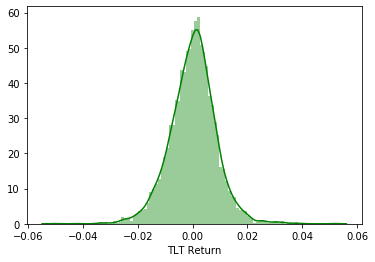

In [9]:
sns.distplot(returns['TLT Return'],color='green',bins=100)

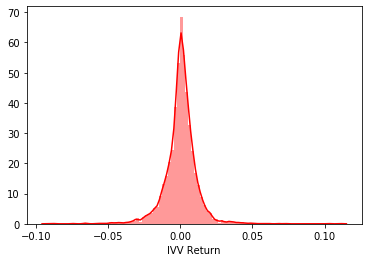

In [10]:
sns.distplot(returns['IVV Return'],color='red',bins=100)

C:\Users\avid\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


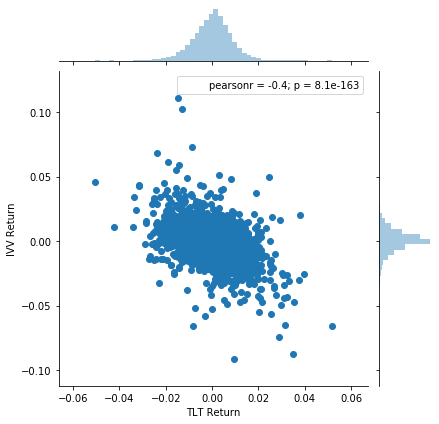

In [12]:
sns.jointplot(returns['TLT Return'],returns['IVV Return']).annotate(stats.pearsonr)